In [3]:
## 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random

warnings.filterwarnings('ignore')

In [4]:
## 载入训练数据集和测试数据集
train_identity = pd.read_csv('data/train_identity.csv')
train_transaction = pd.read_csv('data/train_transaction.csv')
#test_identity = pd.read_csv('data/test_identity.csv')
#test_transaction = pd.read_csv('data/test_transaction.csv')

In [5]:
feature_has_null = train_transaction.isnull().sum()
feature_has_null = feature_has_null.drop(feature_has_null[feature_has_null == 0].index)
features = [index for index in feature_has_null.index]

In [6]:
### feature_nullrate_dic的key值涵义
#### 0：<= 0.02
#### 1: <= 0.05
#### 2: <= 0.1
#### 3: <= 0.2
#### 4: <= 0.4
#### 5: <= 0.6
#### 6: <= 0.8
#### 7: <= 0.85
#### 8: <= 0.90
#### 9: <= 0.95
#### 10: < 1
feature_nullrate_dic = {}

for i in range(12):
    feature_nullrate_dic[i] = []

for feature in features:
    if feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.02:
        feature_nullrate_dic[0].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.05:
        feature_nullrate_dic[1].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.1:
        feature_nullrate_dic[2].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.2:
        feature_nullrate_dic[3].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.4:
        feature_nullrate_dic[4].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.6:
        feature_nullrate_dic[5].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.75:
        feature_nullrate_dic[6].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.8:
        feature_nullrate_dic[7].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.85:
        feature_nullrate_dic[8].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.9:
        feature_nullrate_dic[9].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] <= 0.95:
        feature_nullrate_dic[10].append(feature)
    elif feature_has_null.loc[feature]/train_transaction.shape[0] < 1.0:
        feature_nullrate_dic[11].append(feature)

In [7]:
count = 0
for key in feature_nullrate_dic.keys():
    print('当key={0}时，feature_nullrate_dic[key]的长度为{1}'.format(count, len(feature_nullrate_dic[key])))
    count += 1
    

当key=0时，feature_nullrate_dic[key]的长度为92
当key=1时，feature_nullrate_dic[key]的长度为0
当key=2时，feature_nullrate_dic[key]的长度为0
当key=3时，feature_nullrate_dic[key]的长度为70
当key=4时，feature_nullrate_dic[key]的长度为20
当key=5时，feature_nullrate_dic[key]的长度为24
当key=6时，feature_nullrate_dic[key]的长度为0
当key=7时，feature_nullrate_dic[key]的长度为113
当key=8时，feature_nullrate_dic[key]的长度为0
当key=9时，feature_nullrate_dic[key]的长度为53
当key=10时，feature_nullrate_dic[key]的长度为2
当key=11时，feature_nullrate_dic[key]的长度为0


In [8]:
def checkNullImportance(column):
    tmp = train_transaction[['isFraud',column]]
    tmp[column].where(tmp[column].isnull(),'notNull', inplace=True)
    tmp[column].fillna('Null', inplace=True)
    
    tmp2 = tmp.groupby(column)['isFraud'].value_counts(normalize = True).unstack()
    print()
    print("欺诈交易发生概率与当前特征是否为空值的关联分析")
    print('当前选取特征为{0}：'.format(column))
    print()
    null_rate = feature_has_null.loc[column]/train_transaction.shape[0]
    print('当前特征的空值个数：',feature_has_null.loc[column])
    print('当前特征的空值占比为：',null_rate)
    print()
    print(tmp2)
    print()
    null_to_notNull_ratio = tmp2.loc["Null"][1]/tmp2.loc["notNull"][1]
    print('诈骗交易数在不同特征值下的比例：Null/notNull = ', null_to_notNull_ratio)
    print()
    print()
    print()
    
    plt.figure(figsize=(4,3))
    pic = tmp2[1].plot.bar(stacked = True)
    plt.xticks(rotation='horizontal')
    
# checkNullImportance('card3')


欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V228：

当前特征的空值个数： 460110
当前特征的空值占比为： 0.7791343516103905

isFraud         0         1
V228                       
Null     0.977242  0.022758
notNull  0.921858  0.078142

诈骗交易数在不同特征值下的比例：Null/notNull =  0.29123567074449164




欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V232：

当前特征的空值个数： 460110
当前特征的空值占比为： 0.7791343516103905

isFraud         0         1
V232                       
Null     0.977242  0.022758
notNull  0.921858  0.078142

诈骗交易数在不同特征值下的比例：Null/notNull =  0.29123567074449164




欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V255：

当前特征的空值个数： 449124
当前特征的空值占比为： 0.7605310393876791

isFraud         0         1
V255                       
Null     0.978445  0.021555
notNull  0.922343  0.077657

诈骗交易数在不同特征值下的比例：Null/notNull =  0.27756906752982874




欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V188：

当前特征的空值个数： 450721
当前特征的空值占比为： 0.7632353439225116

isFraud         0         1
V188                       
Null     0.978716  0.021284
notNull  0.920826  0.079174

诈骗交易数在不同特征值下的比例：Null/notNul

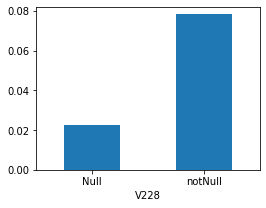

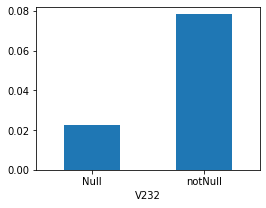

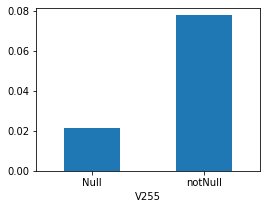

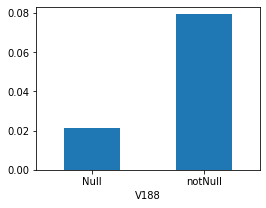

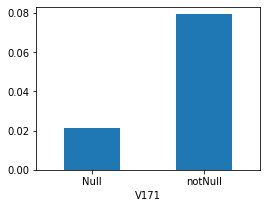

In [49]:
choose_range = 7

for i in random.sample(range(len(feature_nullrate_dic[choose_range])),min(5,len(feature_nullrate_dic[choose_range]))):
    if i < len(feature_nullrate_dic[choose_range]):
        checkNullImportance(feature_nullrate_dic[choose_range][i])

In [12]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V258：

当前特征的空值个数： 460110
当前特征的空值占比为： 0.7791343516103905

isFraud         0         1
V258                       
Null     0.977242  0.022758
notNull  0.921858  0.078142

诈骗交易数在不同特征值下的比例：Null/notNull =  0.29123567074449164





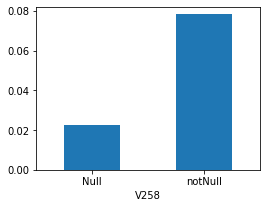

In [9]:
checkNullImportance('V258')


欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V155：

当前特征的空值个数： 508595
当前特征的空值占比为： 0.8612371727571375

isFraud         0         1
V155                       
Null     0.966549  0.033451
notNull  0.955458  0.044542

诈骗交易数在不同特征值下的比例：Null/notNull =  0.7509973608465007




欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V323：

当前特征的空值个数： 508189
当前特征的空值占比为： 0.8605496664070174

isFraud         0         1
V323                       
Null     0.966593  0.033407
notNull  0.955240  0.044760

诈骗交易数在不同特征值下的比例：Null/notNull =  0.7463615100703254




欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V163：

当前特征的空值个数： 508595
当前特征的空值占比为： 0.8612371727571375

isFraud         0         1
V163                       
Null     0.966549  0.033451
notNull  0.955458  0.044542

诈骗交易数在不同特征值下的比例：Null/notNull =  0.7509973608465007




欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为V162：

当前特征的空值个数： 508595
当前特征的空值占比为： 0.8612371727571375

isFraud         0         1
V162                       
Null     0.966549  0.033451
notNull  0.955458  0.044542

诈骗交易数在不同特征值下的比例：Null/notNull =

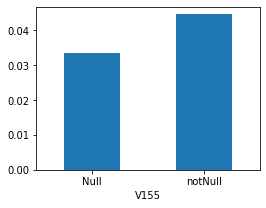

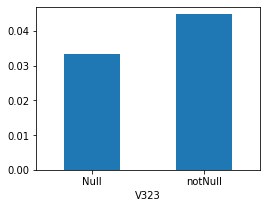

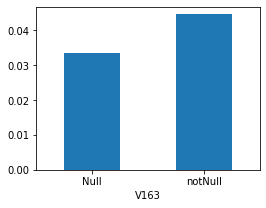

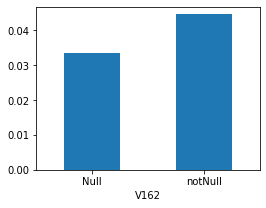

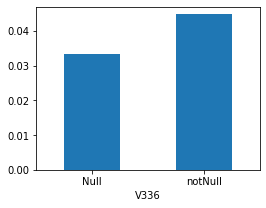

In [22]:
choose_range = 9

for i in random.sample(range(len(feature_nullrate_dic[choose_range])),min(5,len(feature_nullrate_dic[choose_range]))):
    if i < len(feature_nullrate_dic[choose_range]):
        checkNullImportance(feature_nullrate_dic[choose_range][i])

In [24]:
test_identity = pd.read_csv('data/test_identity.csv')
test_transaction = pd.read_csv('data/test_transaction.csv')

In [25]:
train_identity.shape

(144233, 41)

In [29]:
train_transaction.shape

(590540, 394)

In [26]:
merge_df = pd.merge(train_transaction, train_identity, on='TransactionID')

In [39]:
merge_df.shape

(590540, 434)

In [38]:
merge_df = pd.merge(train_transaction, train_identity, how='left', on='TransactionID')

In [41]:
merge_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


欺诈交易发生概率与当前特征是否为空值的关联分析
当前选取特征为P_emaildomain：

当前特征的空值个数： 94456
当前特征的空值占比为： 0.1599485216920107

isFraud               0         1
P_emaildomain                    
Null           0.970462  0.029538
notNull        0.963972  0.036028

诈骗交易数在不同特征值下的比例：Null/notNull =  0.8198462561891099





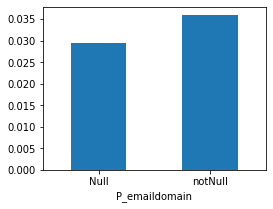

In [47]:
checkNullImportance('P_emaildomain')

In [44]:
len(features)

374

In [45]:
train_transaction.shape

(590540, 394)